In [1]:
from jyrobot.world import World
from jyrobot import config
from jyrobot.canvas import Canvas
import math

from ipylab import JupyterFrontEnd, Panel
from ipywidgets import Layout

In [2]:
def get_canvas(config, width, height, scale=1.0):
    config["width"] = round(width * scale)
    config["height"] = round(height * scale)

    canvas = Canvas(config["width"], config["height"])
    canvas.gc.scale(scale, scale)
    canvas.gc.layout = Layout(width='%spx' % config["width"])
    return canvas

In [3]:
canvas = get_canvas(config, 500, 250, 1.75)

In [4]:
app = JupyterFrontEnd()

panel = None
for widget in app.shell.widgets.values():
    if hasattr(widget, "title") and widget.title.label == "Jyrobot Simulator":
        #panel = widget
        break
        
if panel is None:
    panel = Panel()
    panel.children = [canvas.gc]
    panel.title.label = "Jyrobot Simulator" 
    app.shell.add(panel, 'main', {'mode': 'split-right'})
else:
    panel.children = [canvas.gc]



In [5]:
world = World(config, canvas)

In [6]:
world.reset()

In [7]:
world.robots[0].vx = -5
world.robots[0].va = math.pi/10

In [8]:
world.update(move=False)
world.draw()

In [ ]:
%%time
world.run(2.0, lambda w: print(w.robots[0].stalled))

False
False
False
False
False
False
False
False


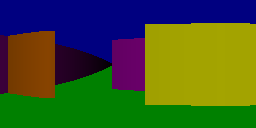

In [54]:
world.robots[0].cameras[0].takePicture()

In [55]:
world.robots[0].cameras[0].cameraShape = [500, 250]
world.robots[0].cameras[0].angle = math.pi/10 # zoom
world.robots[0].cameras[0].colorsFadeWithDistance = 0.5
world.robots[0].cameras[0].camera = [0 for i in range(500)]
world.robots[0].cameras[0].robotHits = [[] for i in range(500)]

In [56]:
world.update(move=False)

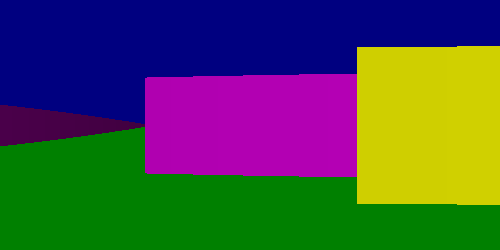

In [57]:
world.robots[0].cameras[0].takePicture()